In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train_path = '/content/drive/MyDrive/Research/manuscript_image_set/training_dataset'
data_validation_path = '/content/drive/MyDrive/Research/manuscript_image_set/validation_dataset'
data_test_path = '/content/drive/MyDrive/Research/manuscript_image_set/testing_dataset'

In [ ]:
img_width = 180
img_height = 180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 2247 files belonging to 3 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 609 files belonging to 3 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 300 files belonging to 3 classes.


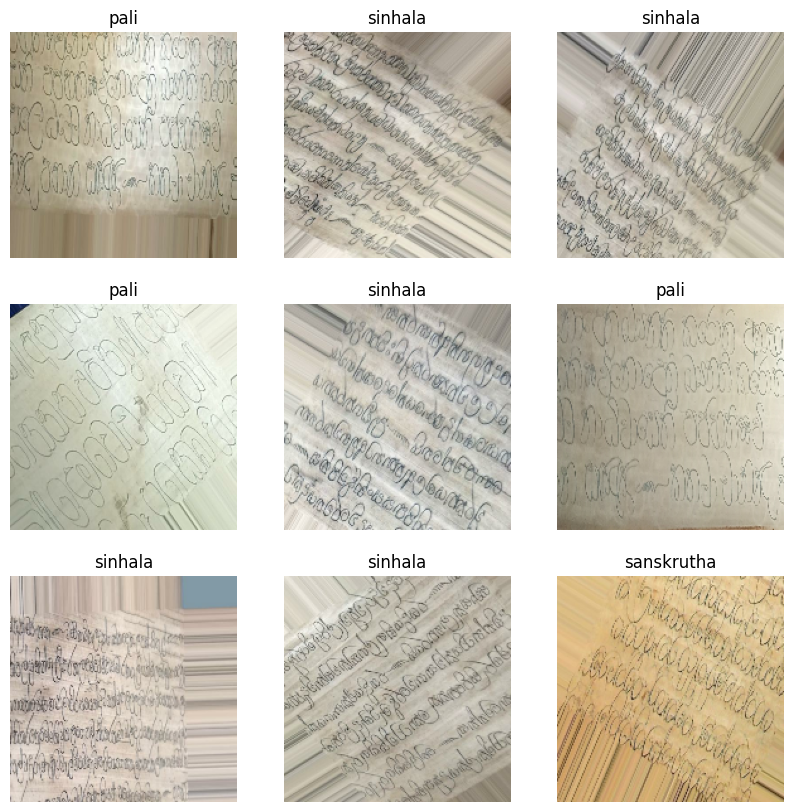

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras import Sequential, layers

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [ ]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)), # Moved Rescaling to be the first layer
    data_augmentation, # Moved data_augmentation after the Rescaling layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epoches_size=25
history=model.fit(data_train, validation_data=data_val, epochs=epoches_size)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.5100 - loss: 1.0034 - val_accuracy: 0.7553 - val_loss: 0.4644
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7008 - loss: 0.4893 - val_accuracy: 0.8210 - val_loss: 0.3654
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7507 - loss: 0.5058 - val_accuracy: 0.8539 - val_loss: 0.3483
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7973 - loss: 0.4336 - val_accuracy: 0.8489 - val_loss: 0.3026
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8625 - loss: 0.3395 - val_accuracy: 0.9064 - val_loss: 0.2171


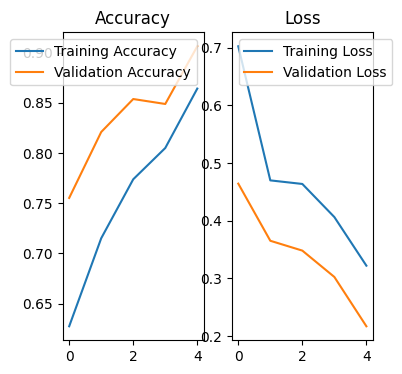

In [ ]:
epochs_range = range(epoches_size)
plt.figure(figsize=(4, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
true_labels = np.concatenate([labels.numpy() for _, labels in data_test])
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step


In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

Testing Accuracy: 90.33%


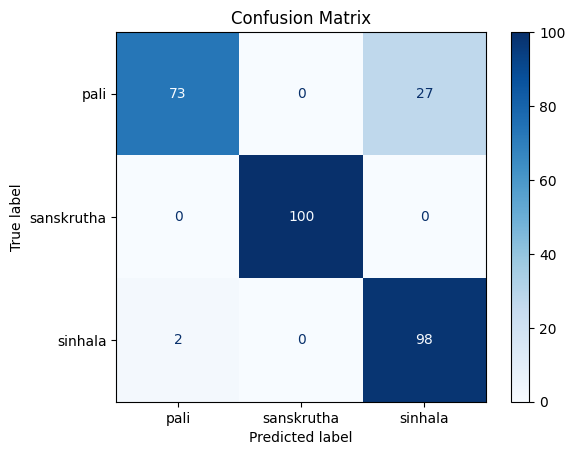

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

class_names = data_cat
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
model.save('/content/drive/MyDrive/Research/language_identifier.h5')